In [29]:
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from PIL import Image
image_files = ['img00.jpeg', 'img01.jpeg', 'img02.jpeg', 'img03.jpeg', 'img04.jpeg', 'img05.jpeg', 'img06.jpeg', 'img07.jpeg', 'img08.jpeg', 'img09.jpeg', 'img10.jpeg', 'img11.jpeg', 'img12.jpeg', 'img13.jpeg', 'img14.jpeg', 'img15.jpeg']  # Agrega aquí los nombres de los archivos de imagen

images = []
for file in image_files:
    img = Image.open(file)
    img = img.resize((28, 28))  # Reemplaza p con el tamaño deseado para las imágenes
    img_array = np.asarray(img)
    images.append(img_array)

data_matrix = np.stack(images).reshape(len(images), -1)



In [30]:
U, S, Vt = np.linalg.svd(data_matrix, full_matrices=False)
print("Tamaño de U:", U.shape)
print("Tamaño de Vt:", Vt.shape)

Tamaño de U: (16, 16)
Tamaño de Vt: (16, 784)


ValueError: cannot reshape array of size 16 into shape (28,28)

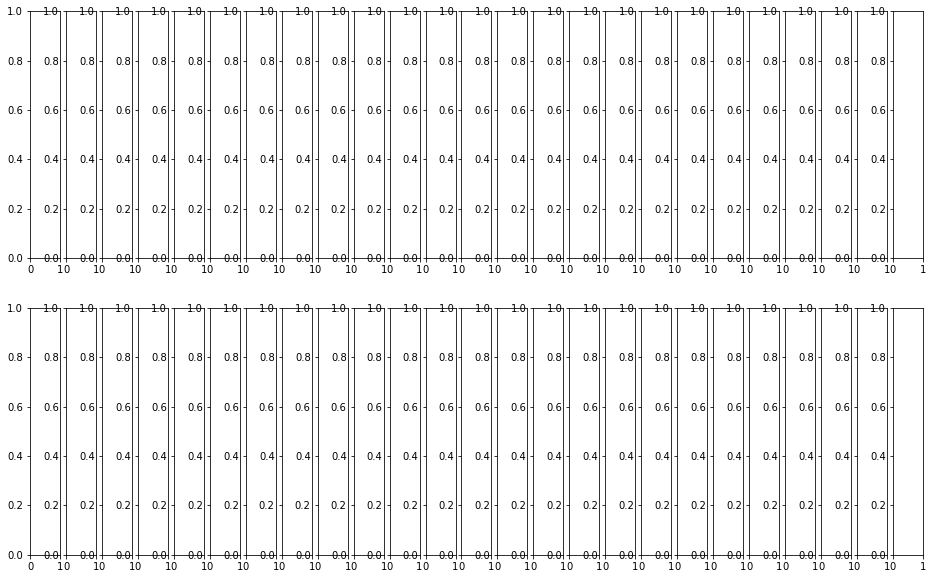

In [41]:
num_dimensions = 25  # Número de dimensiones a visualizar


fig, axes = plt.subplots(2, num_dimensions, figsize=(16, 10))

for i in range(num_dimensions):
    axes[0, i].imshow(U[:, i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(Vt[i, :].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [33]:
image_index = 0  # Índice de la imagen a comprimir
original_image = data_matrix[image_index, :]

error_threshold = 0.05  # Error máximo permitido (5%)
error = np.inf
d = 0

while error > error_threshold:
    d += 1
    compressed_image = U[image_index, :d] @ np.diag(S[:d]) @ Vt[:d, :]
    error = np.linalg.norm(original_image - compressed_image) / np.linalg.norm(original_image)

print("Número mínimo de dimensiones:", d)
print("Error de compresión:", error)


Número mínimo de dimensiones: 13
Error de compresión: 0.04973477903170658


In [20]:
img = Image.open('img00.jpeg')  # Reemplaza 'image1.jpg' con el nombre de tu imagen
width, height = img.size
print("Tamaño de la imagen:", width, "x", height)


Tamaño de la imagen: 28 x 28
